In [2]:
import numpy
print(numpy.__version__)

1.14.6


In [5]:
import pandas
print(pandas.__version__)

0.22.0


In [6]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [7]:
import seaborn
print(seaborn.__version__)

0.7.1


In [5]:
import keras
print(keras.__version__)

2.1.6


In [6]:
import tensorflow
print(tensorflow.__version__)

1.11.0


In [2]:
import numpy as np
import pandas as pd

rides = pd.read_csv('hour.csv')
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
rides.shape

(17379, 17)

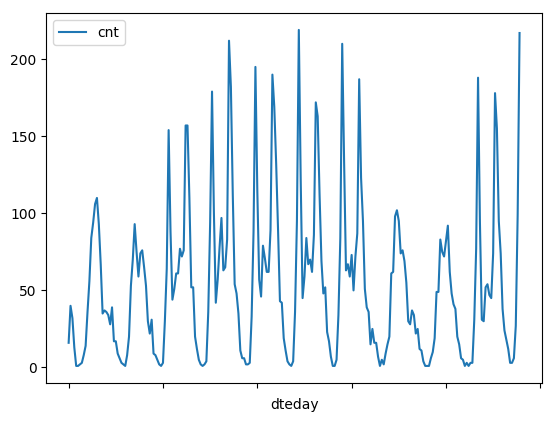

In [34]:
# import matplotlib.pyplot as plt
# x=rides["dteday"][:24*10] 
# y=rides["cnt"][:24*10] 
# plt.plot(x, y)

# 我们绘图看下10天的数据
# 假设10天骑行数据，每天都有24个人骑（实际上并精确）
rides[:24*10].plot(x='dteday', y='cnt')

In [0]:
# 如果读者希望绘制的图的标注用中文显示的话，可以使用如下方式
from matplotlib.font_manager import FontProperties
# 变量font_path是字体地址，读者使用自己的机器上，或者服务器上的中文字体即可
font_path = 'Songti.ttc'
font = FontProperties(fname=font_path, size="large", weight="medium")

In [0]:
import matplotlib.pyplot as plt
# 设置matplotlib在绘图时的默认样式
plt.style.use('default')

import seaborn as sns

Text(0,0.5,u'\u9a91\u884c\u4eba\u6570')

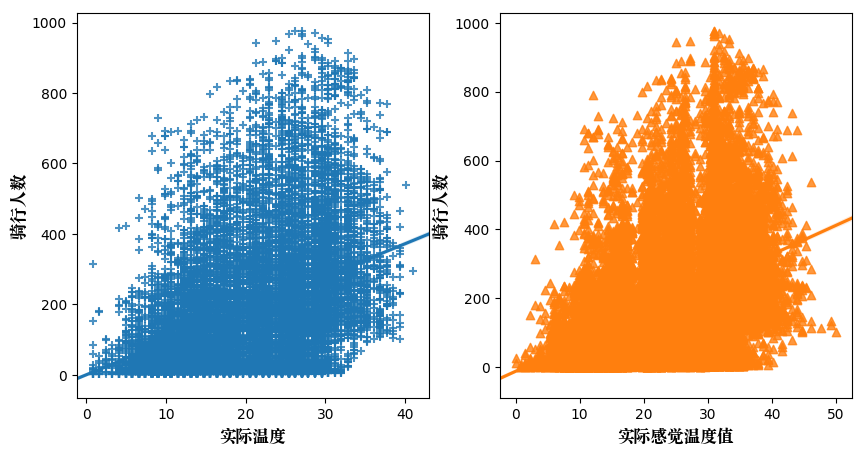

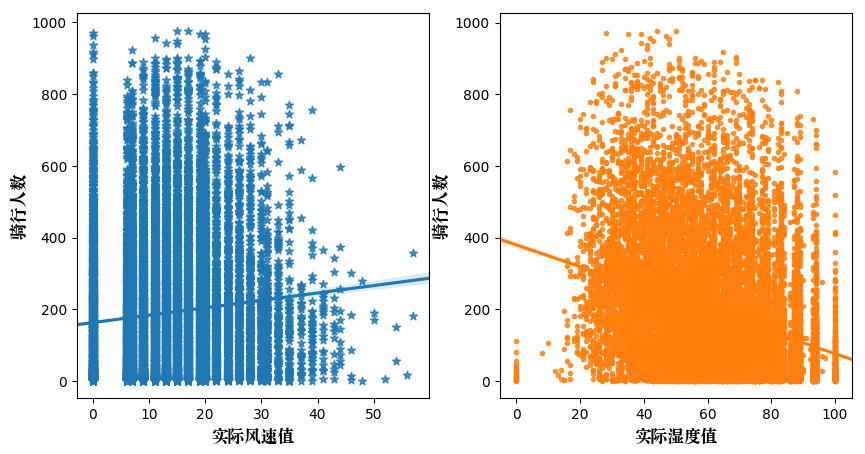

In [31]:
# 我们来看下温度、感觉温度、风速和湿度的散点图

# 创建两个绘图
fig,(ax1,ax2) = plt.subplots(ncols=2)
# 设置两个绘图的总容器大小
fig.set_size_inches(10, 5)

# regplot()函数的参数说明：
# 参数1：x表示X轴的值
# 参数2：y表示y轴的值
# 参数3：data表示原始数据
# 参数4：ax表示绘图的对象
# 参数5：marker表示绘图的每个点使用的标记符号

# 显示温度的骑行数据
# 这里是：实际温度值 = 温度值（概率）* 温度最大值41
sns.regplot(x=rides['temp'] * 41, y='cnt', data=rides, ax=ax1, marker='+')
ax1.set_xlabel(u"实际温度", fontproperties=font)
ax1.set_ylabel(u"骑行人数", fontproperties=font)

# 显示感觉温度的骑行数据
# 这里是：实际感觉温度值 = 感觉温度值（概率）* 感觉温度最大值50
sns.regplot(x=rides['atemp'] * 50, y='cnt', data=rides, ax=ax2, marker='^')
ax2.set_xlabel(u"实际感觉温度值", fontproperties=font)
ax2.set_ylabel(u"骑行人数", fontproperties=font)


# 创建两个绘图
fig,(ax3,ax4) = plt.subplots(ncols=2)
# 设置两个绘图的总容器大小
fig.set_size_inches(10, 5)

# 显示风速的骑行数据
# 这里是：实际风速值 = 风速值（概率）* 风速最大值67
sns.regplot(x=rides['windspeed'] * 67, y='cnt', data=rides, ax=ax3, marker='*')
ax3.set_xlabel(u"实际风速值", fontproperties=font)
ax3.set_ylabel(u"骑行人数", fontproperties=font)

# 显示湿度的骑行数据
# 这里是：实际湿度值 = 湿度值（概率）* 湿度最大值100
sns.regplot(x=rides['hum'] * 100, y='cnt', data=rides, ax=ax4, marker='.')
ax4.set_xlabel(u"实际湿度值", fontproperties=font)
ax4.set_ylabel(u"骑行人数", fontproperties=font)

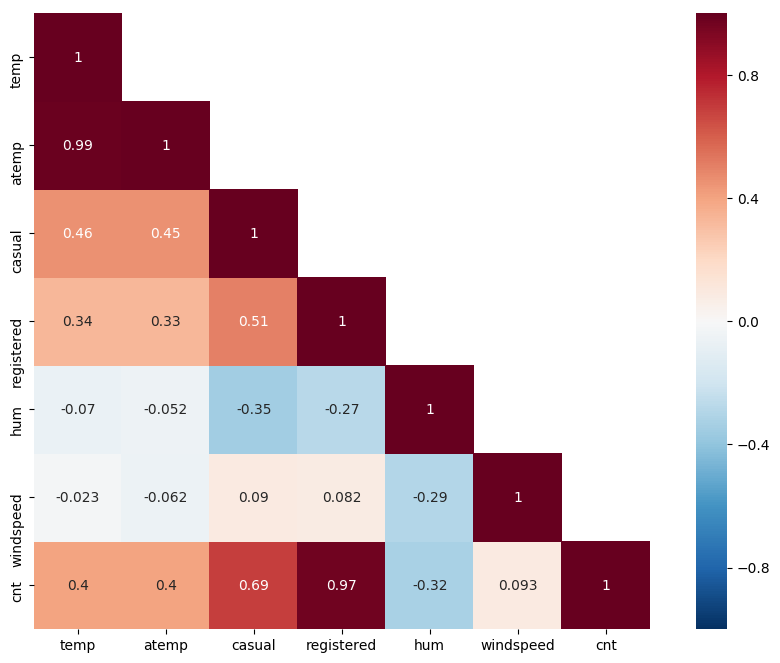

In [33]:
# 分析相关性
# Heatmap热图，一般用来直观的呈现一些原本不易理解或表达的数据，比如密度、频率、温度等，
# 改用区域和颜色这种更容易被人理解的方式来呈现。

# 理解因变量如何受特征数值的影响的一个共同点是在它们之间存在相关性。
# 我们来看下温度、感觉温度、临时骑行用户、已注册用户、湿度、风速和总骑行人数的相关性热图
# corr()函数表示计算值得相关性。它的完整单词是correlation。
corrMatt = rides[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
# np.tril_indices_from()表示返回数组的下三角形的索引
mask[np.tril_indices_from(mask)] = False

# 创建一个绘图
fig, ax= plt.subplots()
# 设置绘图的大小，宽20乘以高10，单位：英寸
fig.set_size_inches(12, 8)
# 用彩色的矩形绘制矩形的图就是热图
# heatmap()函数的参数说明
# 参数1：二维的矩形数据集
# 参数2：mask表示如果数据中有缺失值的cell就自动被屏蔽
# 参数3：square如果是True，表示cell的宽和高相等
# 参数4：annot表示在每个cell上标出实际的数值
sns.heatmap(corrMatt, mask=mask, square=True, annot=True)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,u'\u5e73\u5747\u6bcf\u6708\u9a91\u884c\u4eba\u6570')

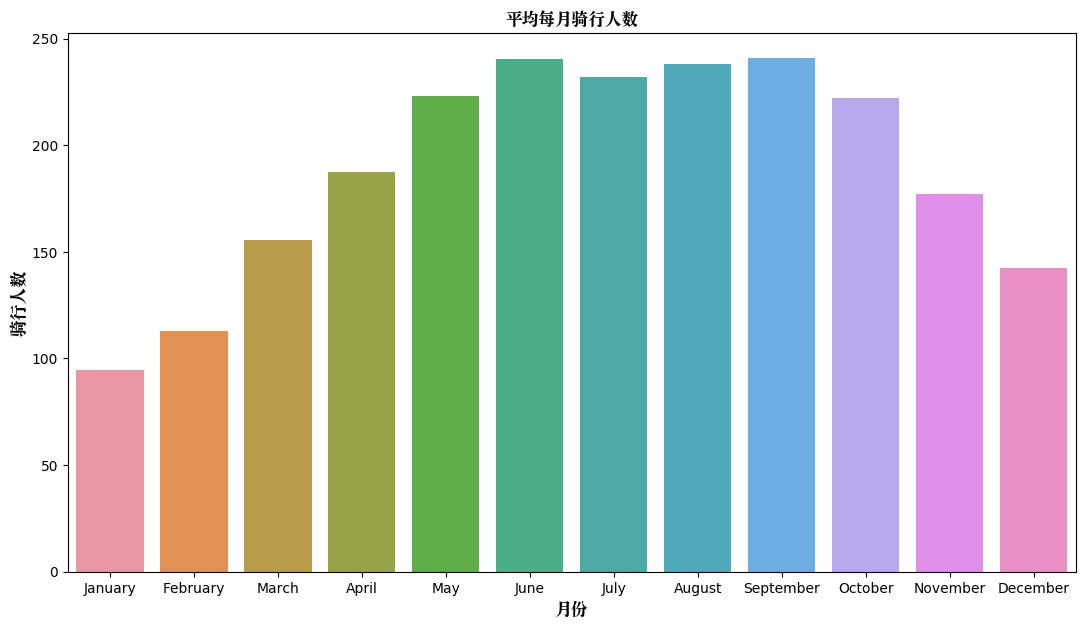

In [35]:
# 可视化分析月份和骑行人数的关系

# 创建一个绘图
fig, ax_mnth = plt.subplots(1)
# 设置绘图的大小
fig.set_size_inches(13, 7)

# 对每个月份的骑行人数分类，然后计算均值。
# 通过reset_index()函数重置索引并创建一个新的DataFrame或者Series对象
mnth_cnt = pd.DataFrame(rides.groupby("mnth")["cnt"].mean()).reset_index()
# 对DataFrame根据月份进行从小到大排序，使用ascending参数
mnth_cnt = mnth_cnt.sort_values(by="mnth", ascending=True)
# 将月份数字转换成具体月份字符串
mnth_cnt['mnth'] = ["January","February","March","April","May","June",
                 "July","August","September","October","November","December"]
# 绘制柱状图
# 参数data表示，x和y的列字段名在原始数据的mnth_cnt里，ax就是绘图的对象
# 参数1：data表示所有要绘制的数据
# 参数2：x表示X轴的数据，数据字段名是mnth，数据在data里
# 参数3：y表示y轴的数据，数据字段名是cnt，数据在data里
# 参数4：ax表示被绘图的对象
sns.barplot(data=mnth_cnt, x='mnth', y='cnt', ax=ax_mnth)

# 设置图的x轴文字
ax_mnth.set_xlabel(u"月份", fontproperties=font)
# 设置图的y轴文字
ax_mnth.set_ylabel(u"骑行人数", fontproperties=font)
# 设置图的标题文字
ax_mnth.set_title(u"平均每月骑行人数", fontproperties=font)

Text(0.5,1,u'\u5728\u56db\u5b63\u91cc\uff0c\u4ee5\u5c0f\u65f6\u4e3a\u8ba1\u6570\u5355\u4f4d\u7684\u5e73\u5747\u6bcf\u5c0f\u65f6\u9a91\u884c\u4eba\u6570')

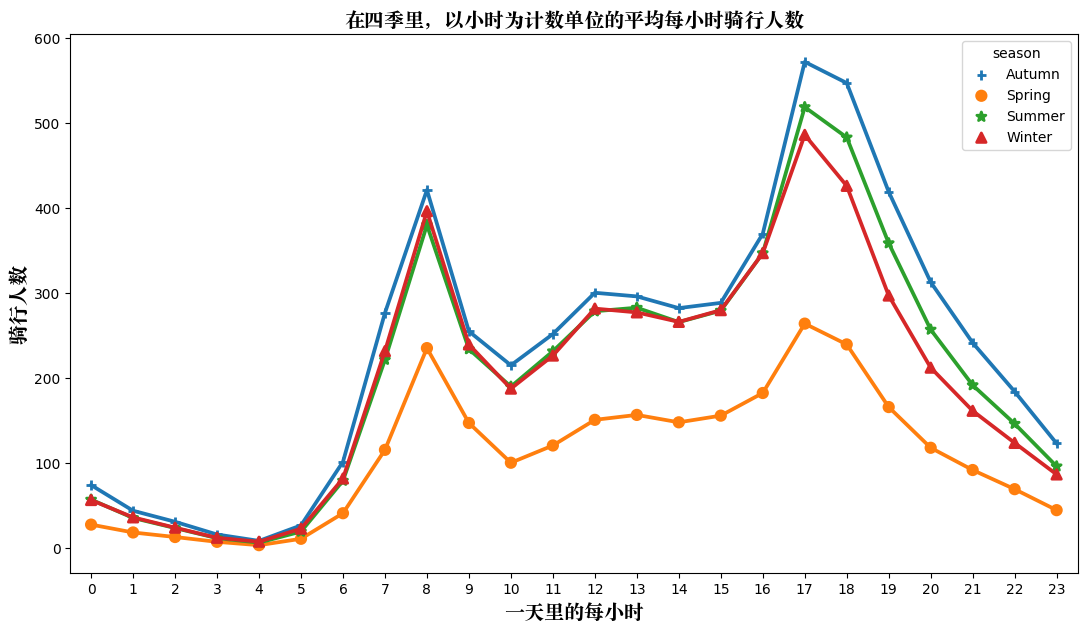

In [10]:
# 可视化分析季节和时间（小时）跟骑行人数的关系

# 创建一个绘图
fig, ax_hr = plt.subplots(1)
# 设置绘图的大小
fig.set_size_inches(13, 7)

# 将季节数字转换成具体的季节字符串
ride_feature_copied = rides.copy()
ride_feature_copied["season"] = \
ride_feature_copied.season.map({ 1 : "Spring", 2 : "Summer", 
                                 3 : "Autumn", 4 : "Winter" })

# 对每个季节里的每天每具体小时的骑行人数分类和排序，然后计算均值。
# 通过reset_index()函数重置索引并创建一个新的DataFrame或者Series对象
hr_cnt = pd.DataFrame(ride_feature_copied.groupby(["hr", "season"], 
                         sort=True)["cnt"].mean()).reset_index()
  
# 绘制散点图
# 参数1：data表示所有要绘制的数据
# 参数2：x表示X轴的数据，数据字段名是hr，数据在data里
# 参数3：y表示y轴的数据，数据字段名是cnt，数据在data里
# 参数4：hue表示会根据指定字段的数据的个数来绘制色彩的线和点
# 参数5：join表示点与点之间是否使用线来绘制连接上
# 参数6：ax表示被绘图的对象
# 参数7：markers表示绘制不同的类别用不同的标记符号
sns.pointplot(data=hr_cnt, 
              x=hr_cnt["hr"], 
              y=hr_cnt["cnt"], 
              hue=hr_cnt["season"], 
              join=True, 
              ax=ax_hr, 
              markers=['+','o','*','^'])

# 设置图的x轴文字
ax_hr.set_xlabel(u"一天里的每小时", fontproperties=font)
# 设置图的y轴文字
ax_hr.set_ylabel(u"骑行人数", fontproperties=font)
# 设置图的顶部标题文字
ax_hr.set_title(u"在四季里，以小时为计数单位的平均每小时骑行人数", fontproperties=font)

Text(0.5,1,u'\u5728\u5de5\u4f5c\u65e5\u548c\u4f11\u606f\u65e5\u91cc\uff0c\u4ee5\u5c0f\u65f6\u4e3a\u8ba1\u6570\u5355\u4f4d\u7684\u5e73\u5747\u6bcf\u5c0f\u65f6\u9a91\u884c\u4eba\u6570')

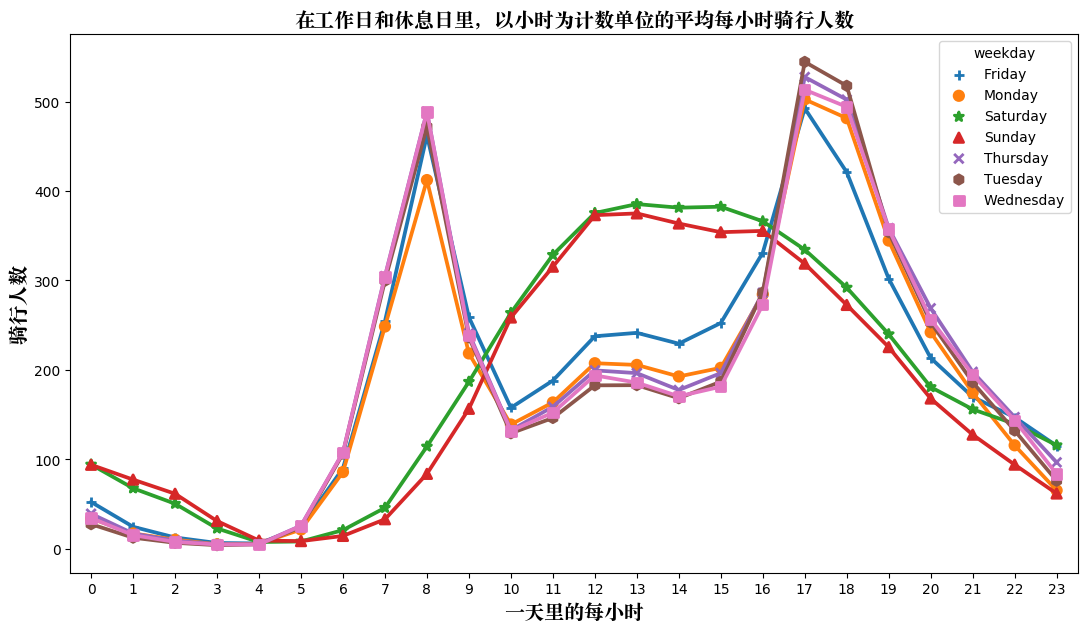

In [11]:
# 可视化分析工作日和时间（小时）跟骑行人数的关系

# 创建一个绘图
fig,(ax_hr_weekday) = plt.subplots(1, 1)
# 设置绘图的大小
fig.set_size_inches(13, 7)

# 将星期数字转换成具体星期几字符串
ride_feature_copied["weekday"] = ride_feature_copied.weekday.map(
                                     { 0 : "Sunday", 1 : "Monday", 
                                       2 : "Tuesday", 3 : "Wednesday", 
                                       4 : "Thursday", 5 : "Friday", 
                                       6 : "Saturday" })

# 对工作日和休息日跟骑行人数分类和排序，然后计算均值。
# 通过reset_index()函数重置索引并创建一个新的DataFrame或者Series对象
hr_weekday_cnt = pd.DataFrame(ride_feature_copied.groupby(["hr", "weekday"], 
                              sort=True)["cnt"].mean()).reset_index()
# 绘制散点图
# 参数1：data表示所有要绘制的数据
# 参数2：x表示X轴的数据，数据字段名是hr，数据在data里
# 参数3：y表示y轴的数据，数据字段名是cnt，数据在data里
# 参数4：hue表示会根据指定字段的数据的个数来绘制色彩的线和点
# 参数5：join表示点与点之间是否使用线来绘制连接上
# 参数6：ax表示被绘图的对象
# 参数7：markers表示绘制不同的类别用不同的标记符号
sns.pointplot(data=hr_weekday_cnt, 
              x=hr_weekday_cnt["hr"], 
              y=hr_weekday_cnt["cnt"], 
              hue=hr_weekday_cnt["weekday"], 
              join=True, 
              ax=ax_hr_weekday,
              markers=['+','o','*','^','x','h','s'])

# 设置图的x轴文字
ax_hr_weekday.set_xlabel(u"一天里的每小时", fontproperties=font)
# 设置图的y轴文字
ax_hr_weekday.set_ylabel(u"骑行人数", fontproperties=font)
# 设置图的标题文字
ax_hr_weekday.set_title(u"在工作日和休息日里，以小时为计数单位的平均每小时骑行人数", 
                        fontproperties=font)

Text(0.5,1,u'\u6839\u636e\u7528\u6237\u7c7b\u578b\u6765\u8ba1\u7b97\u5e73\u5747\u6bcf\u5c0f\u65f6\u9a91\u884c\u4eba\u6570')

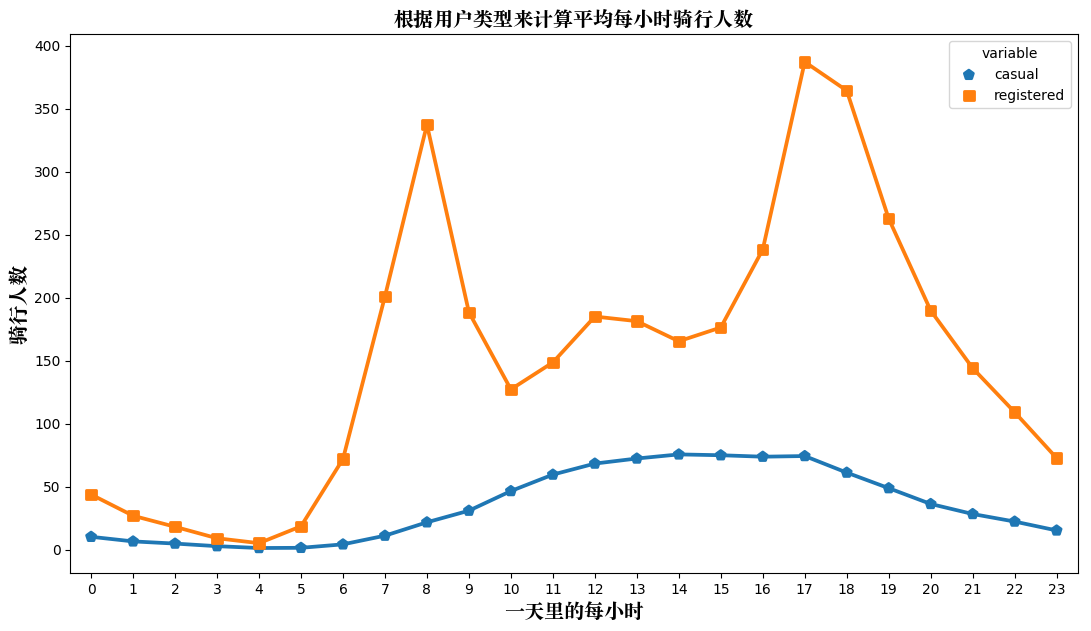

In [16]:
# 可视化分析已注册/临时用户和时间（小时）跟骑行人数的关系

# 创建一个绘图
fig, ax_hr_cas_reg = plt.subplots(1)
# 设置绘图的大小
fig.set_size_inches(13, 7)

# pd.melt()方法表示从宽格式到长格式的转换数据，可选择设置标识符变量
# 这里的标识符是字段hr，变量字段是casual或registered的新字段名variable，而值是value
hr_cas_reg_data = pd.melt(rides[["hr","casual","registered"]], 
                          id_vars=['hr'], 
                          value_vars=['casual', 'registered'])
# 然后通过reset_index()函数重置索引并创建一个新的DataFrame或者Series对象
# variable就是表示已注册/临时用户，而value就是表示骑行人数
hr_cas_reg_data = pd.DataFrame(hr_cas_reg_data.groupby(
            ["hr","variable"], sort=True)["value"].mean()).reset_index()

# 绘制散点图
# 参数1：data表示所有要绘制的数据
# 参数2：x表示X轴的数据，数据字段名是hr，数据在data里
# 参数3：y表示y轴的数据，数据新字段名是value，其实就是骑行个数，数据在data里
# 参数4：hue表示会根据指定字段的数据的种类个数来绘制色彩的线和点
# 参数5：hue_order表示绘制的色彩的顺序
# 参数6：join表示点与点之间是否使用线来绘制连接上
# 参数7：ax表示被绘图的对象
# 参数8：markers表示绘制不同的类别用不同的标记符号
sns.pointplot(data=hr_cas_reg_data,
              x=hr_cas_reg_data["hr"], 
              y=hr_cas_reg_data["value"], 
              hue=hr_cas_reg_data["variable"], 
              hue_order=["casual", "registered"], 
              join=True, 
              ax=ax_hr_cas_reg,
              markers=['p','s'])

# 设置图的x轴文字
ax_hr_cas_reg.set_xlabel(u"一天里的每小时", fontproperties=font)
# 设置图的y轴文字
ax_hr_cas_reg.set_ylabel(u"骑行人数", fontproperties=font)
# 设置图的标题文字
ax_hr_cas_reg.set_title(u"根据用户类型来计算平均每小时骑行人数", fontproperties=font)

In [5]:


# 数据的哑变量处理
# 什么时候要对数据进行哑变量处理了？
# 一个简单的方式，但不精确。就是在编程语言中，
# 如果值是True或者False表示，或者用枚举可以表示的值，我们就可以对该数据进行哑变量处理

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'season', 'weathersit', 'weekday', 
                  'atemp', 'mnth', 'workingday', 'hr', 'dteday']
rides = rides.drop(fields_to_drop, axis=1)


# 我们的目标是预测未来的使用单车的骑行人数
# 所以我们在训练模型时，骑行人数是我们要预测的target，剩下的都是features
# 我们可以单独的对未来的骑行总人数预测，
# 也可以对未来会注册的用户和未来的临时用户的预测

scaled_features = {}
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
for each in quant_features:
    # 计算这几个字段的均值和标准差
    mean, std = rides[each].mean(), rides[each].std()
    scaled_features[each] = [mean, std]
    # 数据减去均值除以标准差等于标准分值（Standard Score），这样处理是为了符合标准正态分布
    rides.loc[:, each] = (rides[each] - mean) / std
    
# 分开features和target
target_cols = ['cnt', 'casual', 'registered']
y_labels = rides[target_cols]
X_features = rides.drop(target_cols, axis=1)

X_features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, 
                                                    y_labels, 
                                                    test_size=0.2, 
                                                    random_state=42)
test_size = X_test.shape[0] / 2
X_valid = X_test[:test_size]
y_valid = y_test[:test_size]

X_test = X_test[test_size:]
y_test = y_test[test_size:]

print("X_train.shape={}, y_train.shape={}.".format(X_train.shape, y_train.shape))
print("X_valid.shape={}, y_valid.shape={}.".format(X_valid.shape, y_valid.shape))
print("X_test.shape={}, y_test.shape={}.".format(X_test.shape, y_test.shape))

X_train.shape=(13903, 56), y_train.shape=(13903, 3).
X_valid.shape=(1738, 56), y_valid.shape=(1738, 3).
X_test.shape=(1738, 56), y_test.shape=(1738, 3).


In [0]:
def get_batches(X, y, num_seqs, num_steps):
    # 使用每个序列大小乘以序列步骤数得出
    per_batch = num_seqs * num_steps
    # 用总个数除以每批次得出需要多少批次
    num_batches = len(X)//per_batch
    
    # 将X和y的值转换成numpy，然后去掉索引列
    X = X.reset_index().values[:,1:]
    y = y.reset_index().values[:,1:]

    # 取出最终的数据   
    X, y = X[:num_batches*per_batch], y[:num_batches*per_batch]

    # 将X和y数据分割成每行是num_steps个
    dataX = []
    dataY = []
    for i in range(0, num_batches*per_batch, num_steps):
        dataX.append(X[i:i+num_steps])
        dataY.append(y[i:i+num_steps])
        
    # 将X和y数据转换成ndarray
    X = np.asarray(dataX)    
    y = np.asarray(dataY)    

    # 将X数据分割成[samples, time steps, features]的元素，并返回生成器对象
    for i in range(0,(num_batches*per_batch)//num_steps, num_seqs):
        # 使用yield关键字表示生成可迭代对象返回
        yield X[i:i+num_seqs,:,:], y[i:i+num_seqs,:,:]

In [8]:
import tensorflow as tf

# 获取训练集列数
num_features = X_train.shape[1]
# 预测目标的列数是3列，分别有：cnt，casual，registered
num_targets = 3

# 我们小批次训练
batch_size = 10
# 每个批次时希望序列能记住的步长是100
num_steps = 100
# 设置LSTM Cell单元的大小为256
lstm_size = 256
# 设置两层LSTM
num_layers = 2
# 学习率
learning_rate = 0.0005
# 保留率
keep_prob_val = 0.75

# 创建输入值和目标值的占位符，之后会动态的传递数据到TensorFlow的计算图中
inputs = tf.placeholder(tf.float32, [batch_size, None, num_features], name='inputs')
targets = tf.placeholder(tf.float32, [batch_size, None, num_targets], name='targets')

# 创建保留率的占位符
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
# 创建学习率的占位符
learningRate = tf.placeholder(tf.float32, name='learningRate')

# 定义创建LSTM的单元函数
def lstm_cell():
    # 创建基础LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size, reuse=tf.get_variable_scope().reuse)
    # 添加dropout层到cell上
    return tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)

# 添加命名范围，就是相当于给计算图上的tensors的RNN层添加一个前缀RNN_layers
with tf.name_scope("RNN_layers"):
    # 参数state_is_tuple等于True表示接收并返回状态，状态是N维元祖
    cell = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(num_layers)], state_is_tuple=True)
    # 初始化Cell的状态
    initial_state = cell.zero_state(batch_size, tf.float32)

# 创建由RNNCell指定的循环神经网络，执行完全动态的输入展开
outputs, final_state = tf.nn.dynamic_rnn(cell, inputs, dtype=tf.float32)

# 添加全连接输出层，输出层数为3，activation_fn设置为None表示使用线性激活，默认激活函数是ReLU
predictions = tf.contrib.layers.fully_connected(outputs, 3, activation_fn=None)
# 使用均方差计算损失函数值
cost = tf.losses.mean_squared_error(targets, predictions)
# 设置优化器为Adam
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 计算验证精确度
correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), tf.cast(tf.round(targets), tf.int32))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [9]:
# 通过反复训练，我发现150次训练，效果还不错
epochs = 150

# 创建保存训练时的检查点对象
saver = tf.train.Saver()

# 先创建两个数组，在训练时保存着训练记录，训练完后，绘图输出显示
val_accuracy=[]
training_loss=[]

# 创建Session会话
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    
    iteration = 1
    # 开始根据epochs次训练
    for e in range(epochs):
        # 先计算初始化RNN Cell的状态
        state = sess.run(initial_state)
        
        # 我们通过get_batches()返回一个可迭代对象，
        # 对象里的每个元素的形状是[samples, time steps, features]
        for ii, (x, y) in enumerate(get_batches(X_train, y_train, batch_size, num_steps), 1):
            # 训练参数，将之前创建的占位符，现在赋上值
            feed = {inputs: x,
                    targets: y,
                    keep_prob: keep_prob_val,
                    initial_state: state}
            # 训练模型
            # 根据损失函数计算得出损失值
            # 根据RNN Cell的状态对象计算得出状态值
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)

            # 每训练（循环）5次，就打印一次记录，并记录到变量training_loss中
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))
                training_loss.append(loss)
                
            # 每训练（循环）25次，就做一次验证
            if iteration%25==0:
                val_acc = []
                # 在验证前，先恢复RNN Cell的状态
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                # 验证整个验证集的验证得分，最后计算均值
                for x, y in get_batches(X_valid, y_valid, batch_size, num_steps):
                    # 验证参数，将之前创建的占位符，现在赋上值
                    feed = {inputs: x,
                            targets: y,
                            keep_prob: 1,
                            initial_state: val_state}
                    # 开始计算验证
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed) 
                    # 每次计算所得分添加到数组，以便于输出打印最后的均值
                    val_acc.append(batch_acc)
                # 并将均值存储到验证得分数组，稍后绘图显示
                val_accuracy.append(np.mean(val_acc))    
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    # 将训练的检查点保存到文件bike-sharing.ckpt里
    saver.save(sess, "checkpoints/bike-sharing.ckpt")

('Epoch: 0/150', 'Iteration: 5', 'Train loss: 0.953')
('Epoch: 0/150', 'Iteration: 10', 'Train loss: 1.008')
('Epoch: 1/150', 'Iteration: 15', 'Train loss: 0.933')
('Epoch: 1/150', 'Iteration: 20', 'Train loss: 0.886')
('Epoch: 1/150', 'Iteration: 25', 'Train loss: 1.006')
Val acc: 0.370
('Epoch: 2/150', 'Iteration: 30', 'Train loss: 0.889')
('Epoch: 2/150', 'Iteration: 35', 'Train loss: 0.920')
('Epoch: 3/150', 'Iteration: 40', 'Train loss: 0.814')
('Epoch: 3/150', 'Iteration: 45', 'Train loss: 0.731')
('Epoch: 3/150', 'Iteration: 50', 'Train loss: 0.707')
Val acc: 0.513
('Epoch: 4/150', 'Iteration: 55', 'Train loss: 0.626')
('Epoch: 4/150', 'Iteration: 60', 'Train loss: 0.557')
('Epoch: 4/150', 'Iteration: 65', 'Train loss: 0.546')
('Epoch: 5/150', 'Iteration: 70', 'Train loss: 0.561')
('Epoch: 5/150', 'Iteration: 75', 'Train loss: 0.554')
Val acc: 0.519
('Epoch: 6/150', 'Iteration: 80', 'Train loss: 0.498')
('Epoch: 6/150', 'Iteration: 85', 'Train loss: 0.456')
('Epoch: 6/150', 'Ite

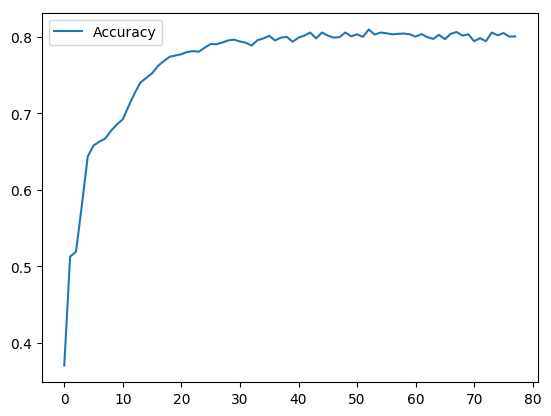

In [10]:
# 输出打印验证精确度
plt.plot(val_accuracy, label='Accuracy')
plt.legend()
_ = plt.ylim()

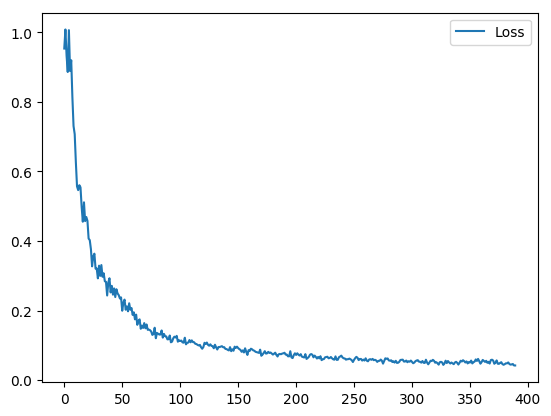

In [11]:
plt.plot(training_loss, label='Loss')
plt.legend()
_ = plt.ylim()

In [12]:
test_acc = []
# 获取TensorFlow的会话
with tf.Session() as sess:
    # 从文件中恢复检查点
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    # 评估模型前重新初始化RNN Cell的状态
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    # 再次通过get_batches()函数获得一个测试数据集的可迭代对象
    for ii, (x, y) in enumerate(get_batches(X_test, y_test, batch_size, num_steps), 1):
        feed = {inputs: x,
                targets: y,
                keep_prob: 1,
                initial_state: test_state}
        # 开始评估模型
        # 计算得出测试集表现分值
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        # 将分值添加到数组中，最后取得它的均值就是测试得分
        test_acc.append(batch_acc)
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints/bike-sharing.ckpt
Test accuracy: 0.794


INFO:tensorflow:Restoring parameters from checkpoints/bike-sharing.ckpt


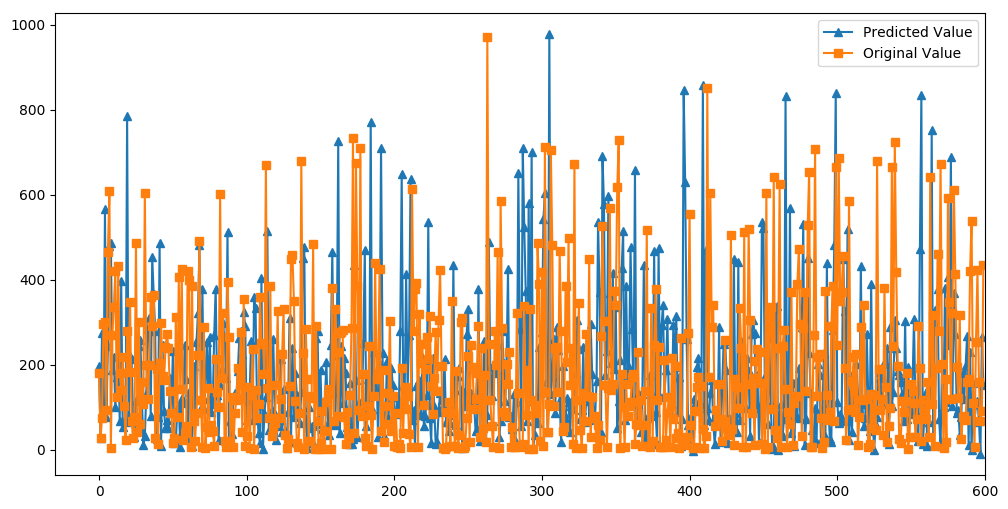

In [18]:
# 做一个对比图，针对预测的值和原始的值
with tf.Session() as sess:
    # 从文件中恢复检查点
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    # 测试模型前重新初始化RNN Cell的状态
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    
    # 初始化绘图的大小
    fig, ax = plt.subplots(figsize=(12, 6))

    # 变量scaled_features是在上面的分割数据时创建的
    mean, std = scaled_features['cnt']
    # 获取测试数据集的一个批次的训练数据
    batch = get_batches(X_test, y_test, batch_size, num_steps)
    x, y = next(batch)
    feed = {inputs: x,
                targets: y,
                keep_prob: 1,
                initial_state: test_state}
    # 计算预测值
    pred = sess.run([predictions], feed_dict=feed)
    # 取出前600条数据作为预测
    pred = pred[0].reshape(600, -1)
    # 因为之前，我们将骑行个数减去均值除以标准差，
    # 那么现在需要显示了，就需要乘以标准差加上均值
    pred[:,0] *= std
    pred[:,0] += mean
    predicted_val = pred[:,0]

    # 绘制预测的值的图
    ax.plot(predicted_val, label='Predicted Value', marker="^")
    # 绘制原始的值的图
    ax.plot((y_test['cnt'][:600]*std + mean).values, label='Original Value', marker="s")
    # 设置右侧限制
    ax.set_xlim(right=len(predicted_val))
    # 在图上显示图例
    ax.legend()